<a href="https://colab.research.google.com/github/alves-bruno-ds/wordcloud_slipknot/blob/main/Nuvem_de_palavras_(Wordcloud)_Slipknot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">


#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---
<img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/C_DADOS.BR%20POSTS.png">



# Nuvem de palavras (Wordcloud) - Slipknot

O Slipknot é uma das bandas mais influentes e importantes do cenário musical contemporâneo. Com um estilo musical que mescla o heavy metal com o nu-metal e o rock alternativo, o grupo se destacou pela sua sonoridade agressiva e suas performances intensas e enérgicas.

<figure>
<center>
<img src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2002.jpg" width="80%" />
<figcaption></figcaption></center>
</figure>

Formada em 1995, em Des Moines, Iowa, nos Estados Unidos, a banda é composta por nove integrantes, cada um identificado por um número e uma máscara personalizada, o que se tornou uma das suas marcas registradas. Suas letras, em geral, abordam temas como dor, raiva, frustração e desespero, o que acabou por conquistar uma legião de fãs em todo o mundo.

Com mais de 25 anos de carreira, o Slipknot lançou diversos álbuns que se tornaram verdadeiros clássicos do gênero, como o homônimo e brutal "Slipknot" (1999), o aclamado"Iowa" (2001) e o mais recente trabalho "The End so Far" (2022). Sua discografia é marcada por músicas poderosas e cativantes, que misturam guitarras pesadas, linhas de percussão e bateria com pegada tribal, vocais guturais e samples eletrônicos, criando um som único e inconfundível.

<figure>
<center>
<img src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2005.jpg" width="80%" />
<figcaption></figcaption></center>
</figure>

Além disso, o Slipknot é conhecido por suas performances ao vivo, que são verdadeiros espetáculos, com fogos de artifício, telões, efeitos especiais e, é claro, as máscaras que dão um ar misterioso e enigmático à banda. Tudo isso contribui para a atmosfera caótica e frenética que é característica dos shows do grupo.

<figure>
<center>
<img src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2003.jpg" width="80%" />
<figcaption></figcaption></center>
</figure>

**Neste *notebook*, iremos analisar os dados (compilado de todas as músicas do Slipknot), destacar quais as palavras são mais utilizadas nas composições, evidenciando os temas abordados nas letras e apresentar o resultado de maneira gráfica em uma nuvem de palavras.**

<center><img alt="Slipknot Logo" width="10%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2004.jpg"></center>

## 1 - Introdução

### Nuvem de Palavras (Wordcloud)

A visualização de wordcloud, ou nuvem de palavras, é uma técnica que exibe as palavras mais frequentes em um texto de maneira gráfica, em que o tamanho das palavras é proporcional à sua frequência. As principais aplicações incluem análise de sentimentos em mídias sociais, análise de feedback de clientes, análise de pesquisas qualitativas, resumos de textos e criação de arte visual.

Uma etapa importante na criação deste gráfico é a exclusão de palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.

Para conseguir desenhar uma wordcloud em Python, temos que instalar a biblioteca `wordcloud` em nosso Collab, utilizando o comando `!pip install`. 

Os dados para o exercício foram extraídos do acervo do site [MLDb - Music Lyrics Database](http://www.mldb.org/) que reúne listas com as letras de diversos artistas.

<center><img alt="wordcloud" width="30%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2006%20-%20data.jpg"></center>

<center><img alt="Slipknot Logo" width="5%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2004.jpg"></center>

## 2 - Preparação 


A primeira coisa a se fazer é instalar alguns pacotes, que não vem por padrão instalados, utiizando o comando `! pip install`:

* **wordcloud** - gerador da nuvem de palavras;
* **pillow** - utlizado para manipulação de imagens em Python;
* **numpy** - biblioteca para trabalhar com funções matemáticas e matrizes;
* **BeautifulSoup** - é ele quem vai auxiliar na análise e extração dos dados, nas páginas em HTML do site de origem (MLDb);
* **tdqm** - apresenta uma barra de progresso ao carregarmos bilbiotecas e operações;

In [3]:
# Rodando o comando ! pip install para carregar as bibliotecas necessárias
! pip install notebook wordcloud pillow numpy bs4 tdqm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.7 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=d08b4bce1760f1be6f30ec206ec7efc2c5dc75270f0e9ca6fcc4157856c47407
  Stored in directory: /root/.cache/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1322 sha256=3ec292e45198df7d6051d0ce594e7458aad9177d2470f36b548cfda6bd0ec99c
  Stored in directory: /root/.cache/pip/wheels/cf/cf/87/969aabe5f7efa9beb7f0de846653f5cbf36bafe358451132df
Successfully built bs4 tdqm


Após a instalação dos pacotes para o nosso Google Collab (os que já não vem instalados por padrão), vamos importá-los para o notebook juntamente com outros pacotes, já nativos do Collab , como o Pandas e o Requests.

In [4]:
from bs4 import BeautifulSoup
import pandas as pd
import re
import requests

Nessa fase, identificamos o endereço da página inicial do site, no qual faremos a pesquisa dos dados e o definimos como `url_base`.

In [5]:
url_base = 'http://www.mldb.org'

No site, temos um acervo grande de artistas, separados por ordem alfabética. O artista do nosso estudo, o Slipknot está catalogado com o número **735**.
Utilizando o pacote Requests, extraímos a página completa do artista **735**, com todas as letras disponíveis da banda. 

(O site foi atualizado até o albúm lançado em 2008 (All Hope is Gone). As letras dos três últimos trabalhos ainda não foram importadas para o banco de dados. Vou verificar a possibilidade de colaborar e atualizar esse acervo).

In [6]:
artista = 'artist-735-slipknot.html'
req = requests.get(f'{url_base}/{artista}', headers={'User-Agent': 'Mozilla/5.0'})


Pronto! Importamos todas as letras do Slipknot disponíveis no site, porém de uma forma desordenada e com todos os caracteres, da maneira que nos é mostrado a seguir. 

In [7]:
pagina = req.text
pagina

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n<head>\n<title>MLDb, The Music Lyrics Database - List of songs of Slipknot by albums</title>\n<meta name="Author" content="Nikolay Pelov, NickSoft" />\n<meta name="Description" content="List of songs of Slipknot by albums" />\n<meta name="Keywords" content="music,song,lyrics,mldb,artist,group,performer,Slipknot,Iowa,Mate. Feed. Kill. Repeat.,Slipknot,S\\T,Mate.Feed.Kill.Repeat,All Hope Is Gone," />\n<meta name="robots" content="index,follow" />\n<meta name="revisit-after" content="7 days" />\n<meta name="title" content="MLDb, The Music Lyrics Database - List of songs of Slipknot by albums" />\n<meta name="distribution" content="Global" />\n<meta name="rating" content="general" />\n<link href="style.css" media="all" type="text/css" rel="stylesheet" />\n<link href="/favicon.ico" rel="shortcut icon"

<center><img alt="Slipknot Logo" width="5%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2004.jpg"></center>

## 3 - Tratamento dos dados

Para facilitar a leitura e a identificação das músicas na página do artista, rodamos o BeautifulSoup. 
Nomeamos esse conjunto de dados organizados de `resumo`.

In [8]:
resumo = BeautifulSoup(pagina, 'html.parser')
resumo

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>MLDb, The Music Lyrics Database - List of songs of Slipknot by albums</title>
<meta content="Nikolay Pelov, NickSoft" name="Author"/>
<meta content="List of songs of Slipknot by albums" name="Description"/>
<meta content="music,song,lyrics,mldb,artist,group,performer,Slipknot,Iowa,Mate. Feed. Kill. Repeat.,Slipknot,S\T,Mate.Feed.Kill.Repeat,All Hope Is Gone," name="Keywords"/>
<meta content="index,follow" name="robots"/>
<meta content="7 days" name="revisit-after"/>
<meta content="MLDb, The Music Lyrics Database - List of songs of Slipknot by albums" name="title"/>
<meta content="Global" name="distribution"/>
<meta content="general" name="rating"/>
<link href="style.css" media="all" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="http://w

Vamos extrair o link de todas as músicas presentes na página do artista.
Para o Slipknot, encontramos a quantidade de 105 músicas no acervo.

In [9]:
links_musicas = resumo.find_all('a', {'href': re.compile(r'song-*')})
len(links_musicas)
print("Quantidade de Músicas:{}".format(len(links_musicas)))

Quantidade de Músicas:105


Para testar essa obtenção dos links, fizemos uma busca, dentre as 105 encontradas, pela música de número (15). 
A música encontrada foi a **Me Inside**, presente no primeiro CD da banda.

In [10]:

links_musicas[15]

<a href="song-21721-me-inside.html">Me Inside</a>

Vamos agora instalar o **tdqm**, para que apareça uma barra de progresso na hora da extração das palavras. Isso facilita percebermos se todas as palavras foram capturadas com sucesso.

In [11]:
!pip install tdqm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Ao extrair as letras das 105 músicas, será criado um arquivo .txt com esses dados. Devemos indicar um caminho para que esse arquivo seja salvo. Neste caso, determinei que o arquivo será salvo em meu Google Drive. Para isso, fizemos um link entre o Google Collab e o Google Drive.

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importamos o **tdqm**, previamente instalado e digitamos as linhas de código a seguir para gerar o nosso arquivo .txt contendo todas e somente as letras das músicas da banda.

In [13]:
from tqdm import tqdm


In [14]:

letras_slipknot = ''

with open('/content/drive/MyDrive/lyrics_slip.txt', 'w') as arquivo_letras:
    for link_musica in tqdm(links_musicas):
        url_musica = link_musica['href']
        url_completa = f'{url_base}/{url_musica}'

        req = requests.get(url_completa, headers={'User-Agent': 'Mozilla/5.0'})

        resumo_musica = BeautifulSoup(req.text, 'html.parser')

        letra = resumo_musica.find('p', {'class': 'songtext'} )
        
        arquivo_letras.write(f'{letra.text}\n')
        
        letras_slipknot += f'{letra.text}\n'


100%|██████████| 105/105 [00:24<00:00,  4.26it/s]


Essa etapa demora um pouco mais, dependendo da quantidade de dados que precisa ser extraído e organizado. Podemos acompanhar o status dessa operação na barra de progresso e perceber que, para esse *dataset*, todas as letras foram extraídas com sucesso. 

Para consultar se estamos com todas as letras na base de palavras, faremos uma pesquisa: a música 20 de 105.
Note que nos é apresentado um trecho da música.

In [15]:
letras_slipknot[20:105]

'd and you have failed with it \nNo time to care, just time to say  Who gives a shit  \n'

Porém, com essa configuração, ainda não é possível gerar a nossa nuvem de palavras. Precisamos organizar as músicas em uma única lista. Para isso vamos usar o comando `split` para concatenar tudo e gerar a lista.
Neste cenário, todo espaço e quebra de linhas serão eliminados e ficarão apenas as palavras. 

In [16]:
tokens = letras_slipknot.split()

In [17]:
len (tokens)
print("Quantidade de Palavras:{}".format(len(tokens)))

Quantidade de Palavras:23010


OK! Lista criada. **Ela tem 23.010 palavras! (que no caso, chamamos de tokens)**
Fazendo uma pesquisa, dentre todas elas, ao procurarmos pela ordem 666 na lista, encontramos a palavra *like*.

In [18]:
tokens[666]

'like'

Nessa quantidade de *tokens*, pode ser que existam alguns que estejam duplicados. Por exemplo, podemos ter a palavra '*like*' e também '*Like*' (um com letra minúscula e a outro com letra maiúscula).Para que possamos considerar ambas como um único registro, recomenda-se converter todas as entradas em letra minúscula, utilizando o recurso `lower()`.

In [19]:
for i in range (len(tokens)):
  tokens[i] = tokens [i]. lower(). strip()


Neste estágio, já temos nossa lista com todas os *tokens* (palavras) presentes nas músicas do Slipknot, organizados em formato de lista, com todos os caracteres em letra minúscula. Vamos, finalmente para a geração da nuvem de palavras.

<center><img alt="Slipknot Logo" width="5%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2004.jpg"></center>

## 4 - Geração da Nuvem de Palavras

### Stopwords

O sentido da elaboração de uma *wordcloud* nesse estudo é destacar as palavras que mais estão presentes nas letras das músicas da banda e, de acordo com a recorrência, entender qual o tema das canções, se são alegres, se falam de protesto, de sentimento, etc. Porém, sabemos que, como em qualquer texto, temos diversos termos como artigos, pronomes e preposições, por exemplo, em português (um, a, uma, eu, para, aquele, o, etc), que aparecem com muita frequência (até mais que as demais palavras), mas para nós, não colaboram para determinar o sentido das composições. 
Para resolver essa questão e eliminar esses termos da lista, utilizamos o recurso `STOPWORDS`.

Após o carregamento dos demais pacotes (nativos e instalados previamente), e a eliminação das *stopwords*, nosso *dataset* está pronto para a representação gráfica.

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Listando os 5 primeiros tokens da lista, temos:


In [21]:
tokens[:5]

['the', 'system', 'has', 'failed', 'and']

Note que são palavras, separadas por vírgula. Vamos novamente utilizar o comando `join`para tranformar essas palavras em uma única frase, neste caso, chamada de `palavras_slipknot`.

In [22]:
palavras_slipknot = " ".join(tokens)

Fazendo uma busca nos 50 primeiros caracteres temos:

In [23]:
palavras_slipknot[:50]

'the system has failed and you have failed with it '

Note que os 50 caracteres são formados pelas letras + os espaços entre as palavras. (A contagem agora é por letra e não mais por termo).

### Nuvem de palavras - Sem máscara


Vamos gerar a nossa primeira nuvem de palavras, na configuração padrão, utilizando-se do conjunto de dados já tratado, `palavras_slipknot`.

In [24]:
wordcloud = WordCloud(background_color = 'black', 
                random_state=42).generate(palavras_slipknot)

Mostrando a imagem:



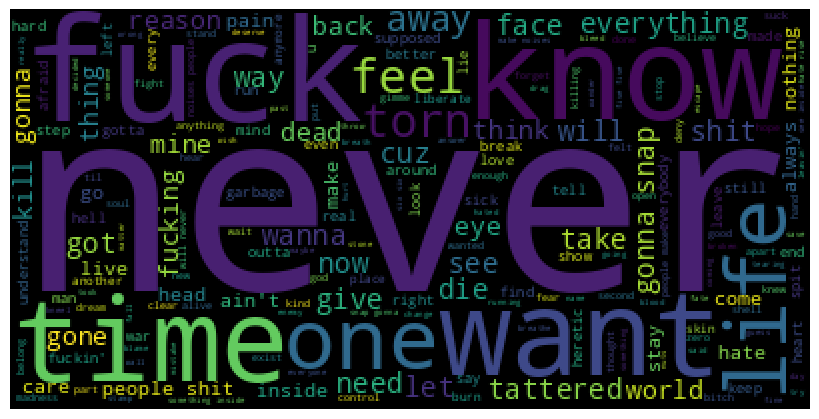

In [25]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Já conseguimos observar e saber quais as palavras mais recorrentes nas letras da banda, de acordo com o tamanho que elas aparecem na imagem.

### Nuvem de palavras - Com máscara

Para gerar uma imagem ainda mais personalizada e estilosa, vamos adicionar uma imagem, chamada de máscara, mesclada ao conjunto de palavras, mostrando a informação de uma maneira mais atraente.

### Conceito de máscara
Uma "mask image", em tradução livre para o português, seria uma imagem de máscara em preto e branco.

É uma imagem binária que é usada para selecionar determinadas partes de uma imagem original. Nesse contexto é aquela que contém apenas dois valores de pixel possíveis: preto e branco (ou 0 e 1, respectivamente).

Em nosso  caso, ao inserir o desenho na nuvem, o trecho com pixels brancos, ficará vazio, e o trecho com pixels pretos, preeenchido com as palavras. Ou seja, a nuvem de palavras terá a forma do trecho de cor preta da imagem importada.

Para o nosso exemplo vamos utilizar o logo do Slipknot com grafia em pixels brancos




<center><img alt="Slipknot Logo" width="50%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/mascara%20slipknot.jpg"></center>

Para importação da imagem, salvamos a mesma no Google Drive e direcionamos o link para carregar a `imagem_mascara`

In [26]:

imagem_mascara = np.array(Image.open("/content/drive/MyDrive/Data Science na Prática/mascara slipknot.jpg"))

imagem_mascara

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Gerando novamente a nuvem de palavras, agora com a inserção da máscara e fazendo algumas personalizações no *Matplotlib* [vide documentação](https://matplotlib.org/stable/tutorials/colors/colormaps.html) como a quantidade máxima de palavras e a cor da fonte, temos:

In [29]:
wordcloud = WordCloud(background_color = 'white',
                    max_words = 1000,
                    mask=imagem_mascara,
                    colormap='inferno',
                    random_state=42).generate(palavras_slipknot)

Mostrando a imagem:

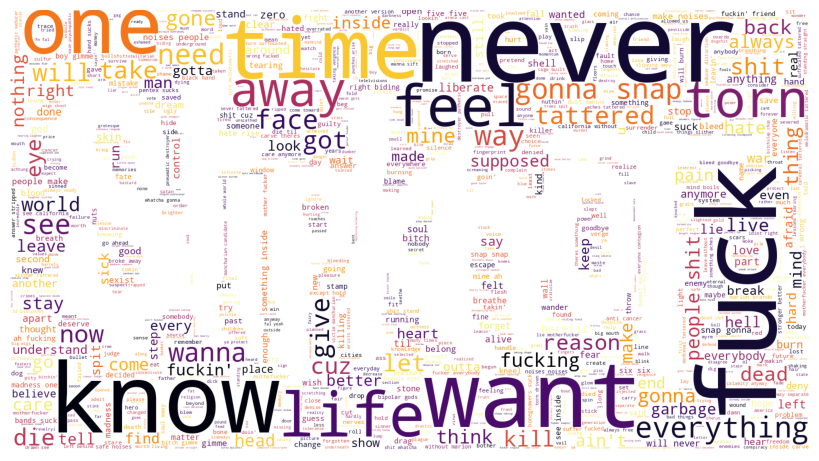

In [30]:

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Contagem global das palavras

Aqui vamos listar e quantificar todas as palavras presentes no *dataset*

In [31]:
from collections import Counter
slipknot_count = Counter (tokens)
slipknot_count.most_common()

[('i', 930),
 ('the', 800),
 ('you', 734),
 ('and', 490),
 ('to', 464),
 ('my', 430),
 ('a', 406),
 ('-', 403),
 ('of', 356),
 ('is', 339),
 ('me', 312),
 ("i'm", 298),
 ('in', 277),
 ('it', 260),
 ('all', 245),
 ('your', 200),
 ('this', 182),
 ('be', 177),
 ("don't", 167),
 ("can't", 145),
 ('never', 139),
 ("it's", 136),
 ('not', 135),
 ('that', 132),
 ('but', 123),
 ('we', 120),
 ('gonna', 119),
 ('what', 119),
 ('are', 114),
 ('fuck', 112),
 ('out', 103),
 ('on', 102),
 ('get', 102),
 ("you're", 100),
 ('like', 98),
 ('do', 95),
 ('know', 95),
 ('for', 88),
 ('if', 87),
 ('want', 85),
 ('time', 84),
 ('just', 84),
 ('so', 84),
 ('have', 83),
 ('am', 83),
 ('with', 80),
 ('can', 78),
 ('will', 74),
 ('away', 74),
 ('from', 73),
 ('when', 70),
 ('one', 70),
 ('was', 70),
 ('everything', 70),
 ('up', 69),
 ('no', 67),
 ('wanna', 67),
 ('feel', 67),
 ('they', 67),
 ('see', 64),
 ('shit', 63),
 ('only', 63),
 ('need', 62),
 ('/', 62),
 ('torn', 60),
 ('cuz', 57),
 ('got', 55),
 ('tatter

Como podemos perceber pela contagem, ainda temos uma série de artigos e preposições presentes em grande quantidade na lista. Faremos uma nova limpeza (`STOPWORDS`), indicando quais as palavras devem ser eliminadas, desta forma, deixando nossa imagem menos poluída.

In [37]:
stopwords_customizada = STOPWORDS.union({'the', 'you', 'and', 'to', 'a', 'my','I', 'it','this', 'that'})

Gerando a imagem, após nova limpeza:

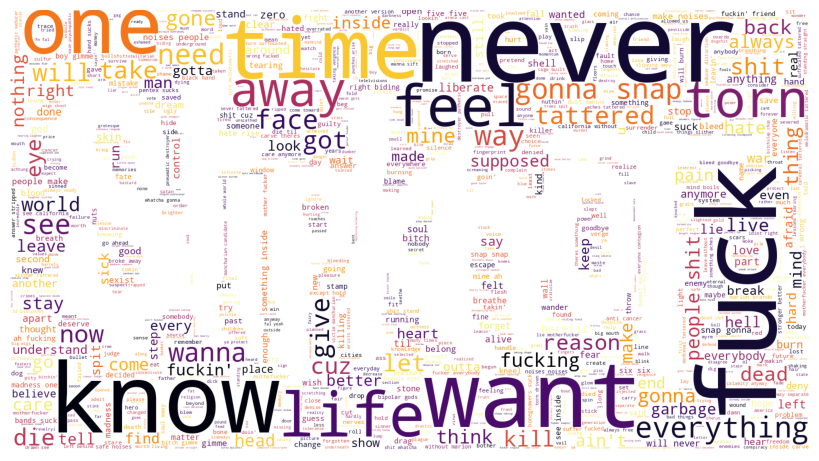

In [38]:
wordcloud = WordCloud(background_color = 'white',
                stopwords = stopwords_customizada,
                max_words = 1000,
                mask=imagem_mascara,
                colormap='inferno',
                random_state=42).generate(palavras_slipknot)

# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<center><img alt="Slipknot Logo" width="5%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2004.jpg"></center>

## 5 - Imagem final

Para fazer a exportação, vamos definir alguns parâmetros:
* Alterar a cor de fundo para preto em `background_color`;
* Inserir um contorno vermelho aos pixels brancos da máscara em `countour_width`e `contour_color`;
*Alterar a cor das letras das palavras para tons de azul em `colormap;`


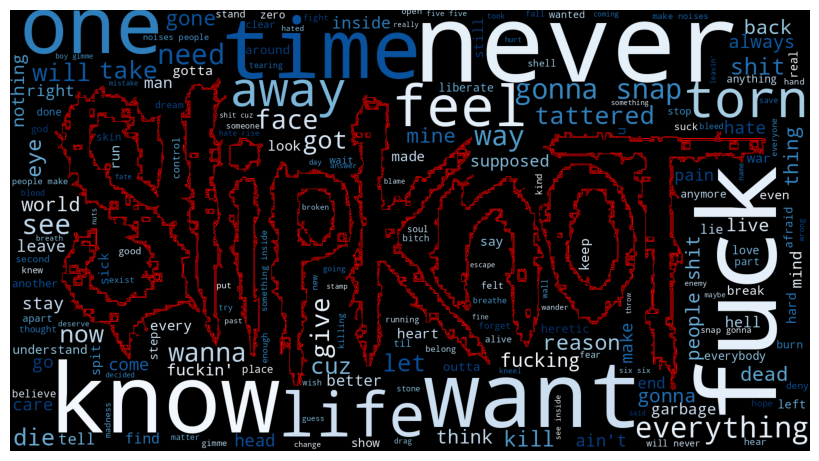

In [41]:
wordcloud = WordCloud(background_color = 'black',
                stopwords = stopwords_customizada,
                contour_width = 0.2,
                contour_color  = 'red',
                mask=imagem_mascara,
                colormap='Blues',
                random_state=42).generate(palavras_slipknot)

# Mostrando a imagem
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

# Remove os eixos do gráfico
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Exportação da imagem 

Após finalizada, a imagem pode ser exportada e baixada para o terminal  ou disco virtual. Neste caso, optamos em salvá-la em formato *.png* direto para o Google Drive. 

In [42]:
wordcloud.to_file('/content/drive/MyDrive/slipknot.png')

<center><img alt="Slipknot Logo" width="5%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2004.jpg"></center>

### 6 - Conclusão

Podemos concluir que a visualização por nuvem de palavras (wordcloud) é uma excelente forma observar e entregar um estudo de recorrência de termos como este. Visualmente é muito fácil perceber, neste caso,  quais as palavras que mais se repetem no *dataset* e entender qual o teor das composições deste artista.
Palavras em evidência como **never, fuck, life, shit, torn, feel, pain, die**, nos mostram claramente que as letras do Slipknot não são românticas e obviamente, para quem conhece a banda, saberia que esse tipo de abordagem não combina com o som.

Sem entrar em detalhes e analisando apenas os termos, podemos supor que as letras falam de sentimentos, porém de uma maneira agressiva e "crua", sem metáforas. São tratados com muito ceticismo temas como morte, situações da vida e externalização de raiva e dor.

Portanto, além de todo o apelo visual, marketing e performances excepcionais, é prudente atribuir essa temática "down" nas canções,  muito comum entre as bandas nascidas no final dos anos 90, como um dos responsáveis pela grande popularidade da banda entre os jovens e adoslescentes.É nessa fase da vida que nos tornamos mais questionadores e um tanto quanto rebeldes em relação as circustâncias. Com certeza, o Slipknot aproveita e muito dessa rebeldia para arrebatar e fidelizar seus fãs. 

<center><img alt="Slipknot Logo" width="5%" src="https://raw.githubusercontent.com/alves-bruno-ds/data-science-BR/main/Slipknot%2004.jpg"></center>